In [108]:
import json
from urllib.request import urlopen
from PIL import Image, ImageDraw
import pandas as pd
import sqlite3
import numpy as np
import glob
import os

In [109]:
PIXELS_X = 910
PIXELS_Y = 910  # equal to the number of scan lines

In [110]:
TEST_SET_TILE_IDS = [1939,2099,2179,2184]
TEST_SET_TILE_ID = TEST_SET_TILE_IDS[3]
THRESHOLD = '0_05'

In [111]:
PREDICTIONS_JSON_DIR = '/Users/darylwilding-mcbride/Downloads/experiments/dwm-test/predictions'
OVERLAY_DIR = '/Users/darylwilding-mcbride/Documents/Personal/PhD/source/yolo-tile-labelling/training set/overlays'

In [112]:
prediction_json_file = '{}/predictions-frame-{}-tile-33-thresh-{}.json'.format(PREDICTIONS_JSON_DIR, TEST_SET_TILE_ID, THRESHOLD)
with open(prediction_json_file) as file:
    prediction_json = json.load(file)

In [113]:
tile_file_name = os.path.basename(prediction_json[0]['filename'])
tile_file_name

'frame-2184-tile-33.png'

Draw the predictions (in green) over the ground-truth overlay (in red)

In [114]:
img = Image.open('{}/{}'.format(OVERLAY_DIR, tile_file_name))

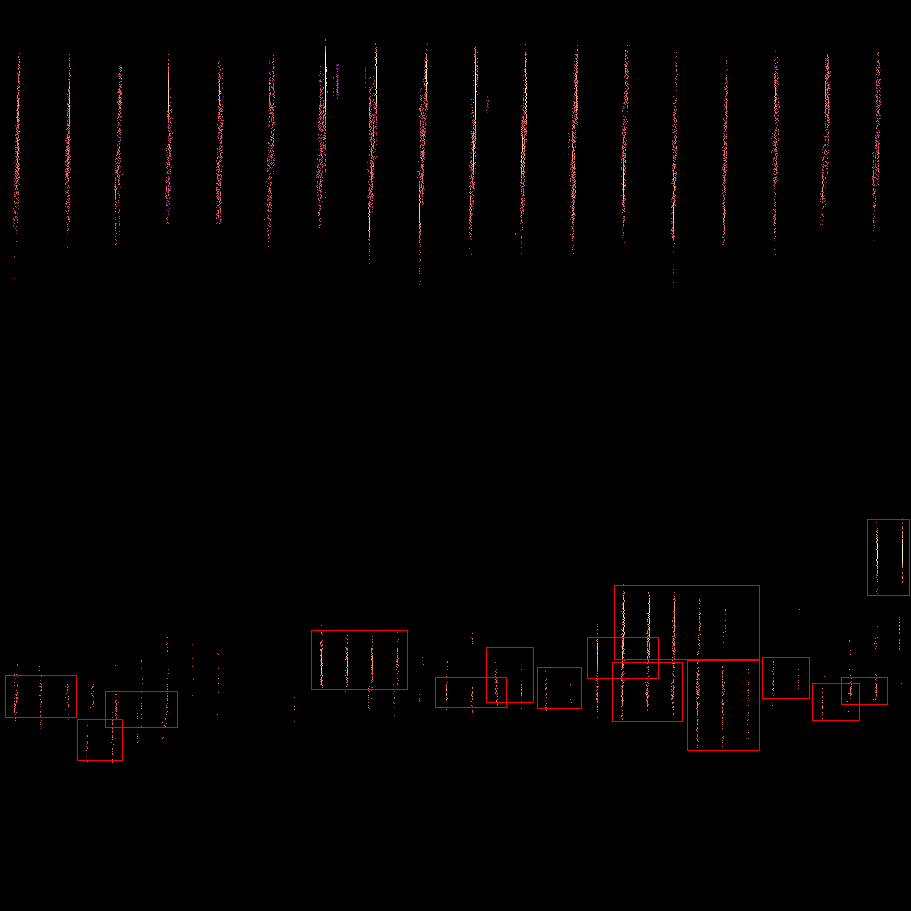

In [115]:
img

In [116]:
draw_predictions = ImageDraw.Draw(img)
predictions = prediction_json[0]['objects']
for prediction in predictions:
    charge_state_label = prediction['name']
    coordinates = prediction['relative_coordinates']
    x = (coordinates['center_x'] - (coordinates['width'] / 2)) * PIXELS_X
    y = (coordinates['center_y'] - (coordinates['height'] / 2)) * PIXELS_Y
    width = coordinates['width'] * PIXELS_X
    height = coordinates['height'] * PIXELS_Y
    draw_predictions.rectangle(xy=[(x, y), (x+width, y+height)], fill=None, outline=(100,255,100,20))

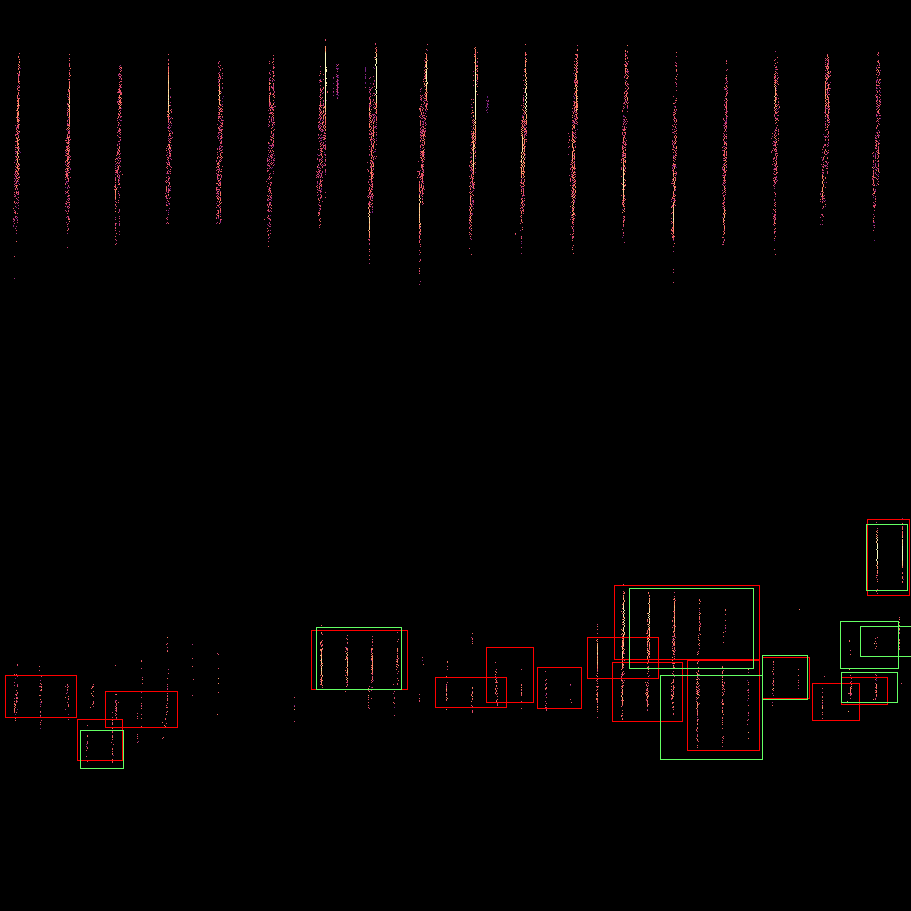

In [117]:
img